#Load Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
PATH = "/content/HomeWork-churn_rate_prediction.csv"
df = pd.read_csv(PATH)
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'days_since_last_login'}>],
       [<Axes: title={'center': 'avg_time_spent'}>,
        <Axes: title={'center': 'avg_transaction_value'}>],
       [<Axes: title={'center': 'points_in_wallet'}>,
        <Axes: title={'center': 'churn_risk_score'}>]], dtype=object)

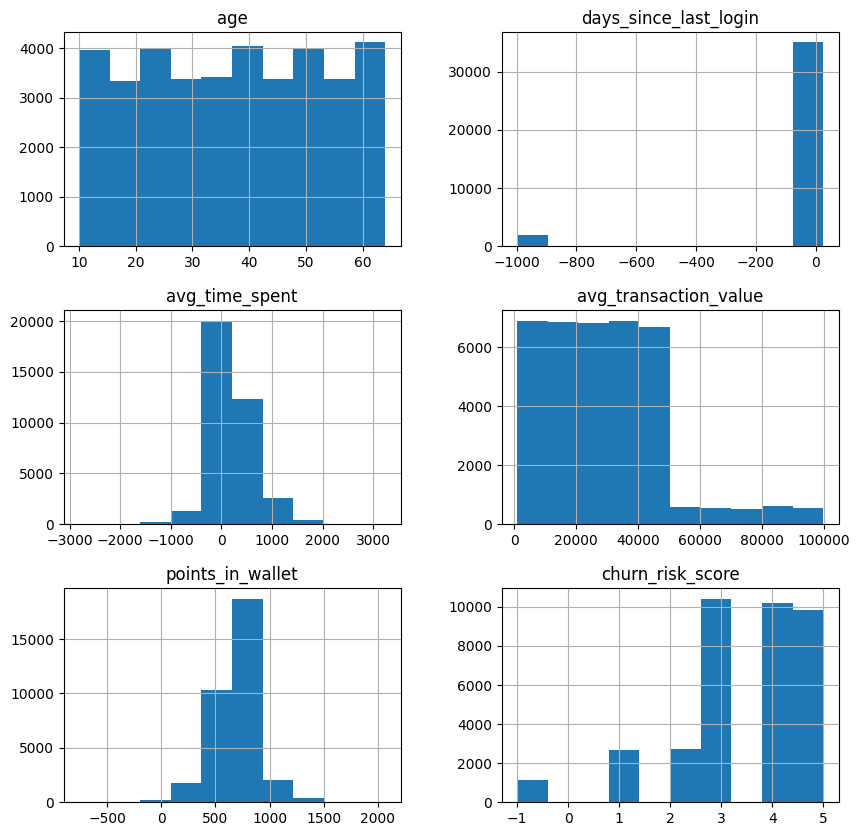

In [ ]:
df.hist(figsize=(10,10))

#Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [ ]:
df.isnull().sum()

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [ ]:
#Kiểm tra các giá trị unique của object features ---> loại được các features không có ý nghĩa
object_cols = [col for col in df.columns if df[col].dtype=='O']
for col in object_cols:
  print(col, df[col].nunique())

customer_id 36992
Name 36992
gender 3
security_no 36992
region_category 3
membership_category 6
joining_date 1096
joined_through_referral 3
referral_id 11359
preferred_offer_types 3
medium_of_operation 4
internet_option 3
last_visit_time 30101
avg_frequency_login_days 1654
used_special_discount 2
offer_application_preference 2
past_complaint 2
complaint_status 5
feedback 9


In [ ]:
#Feature avg_frequency_login_days có đa số các giá trị kiểu float nhưng do có giá trị 'Error' nên bị chuyển sang type Object
#---> cần được xử lý
print(df['avg_frequency_login_days'])
df.loc[df['avg_frequency_login_days']=='Error']

0         17.0
1         10.0
2         22.0
3          6.0
4         16.0
         ...  
36987      6.0
36988     28.0
36989    Error
36990     20.0
36991    Error
Name: avg_frequency_login_days, Length: 36992, dtype: object


,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
39,fffe43004900440034003100390036003500,Desire Rieder,49,F,M9F3TE2,Village,Platinum Membership,2017-06-09,Yes,CID18445,...,706.36,19062.25,Error,780.580000,Yes,No,No,Not Applicable,Poor Product Quality,3
44,fffe4300490044003900300031003500,Pam Seigler,36,M,C7QZITU,Village,Silver Membership,2016-11-28,Yes,CID33962,...,691.09,17989.46,Error,NaN,No,Yes,Yes,Solved,No reason specified,4
45,fffe43004900440033003000360031003100,Lore Yarber,12,M,B1XF70C,City,Premium Membership,2017-02-13,No,xxxxxxxx,...,33.09,55607.35,Error,NaN,Yes,No,No,Not Applicable,User Friendly Website,1
48,fffe43004900440032003800320037003300,Glendora Borel,30,M,TER02YR,City,Platinum Membership,2015-12-11,?,CID4129,...,100.42,86433.91,Error,719.930000,No,Yes,Yes,Unsolved,Reasonable Price,2
50,fffe43004900440031003700370031003300,Luisa Allinder,23,M,UAAYTIM,Village,Gold Membership,2015-10-22,Yes,CID24995,...,65.25,5136.08,Error,755.220000,No,Yes,No,Not Applicable,Poor Customer Service,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36960,fffe43004900440031003800370034003500,Palma Dunker,40,F,5AQ78IZ,Town,Basic Membership,2017-11-20,No,xxxxxxxx,...,96.33,16361.98,Error,954.137008,No,Yes,No,Not Applicable,Too many ads,4
36962,fffe43004900440032003700320032003500,Zoe Andrzejewski,26,M,4318ETP,City,Gold Membership,2017-02-08,No,xxxxxxxx,...,202.95,10356.88,Error,693.380000,Yes,No,Yes,Solved in Follow-up,Poor Customer Service,4
36971,fffe43004900440033003900370033003000,Rasheeda Ramsdell,42,F,OYJ0W89,Town,Premium Membership,2015-02-04,?,CID54811,...,34.10,39439.10,Error,1224.393346,Yes,No,Yes,Solved in Follow-up,Too many ads,3
36989,fffe4300490044003500330034003100,Luciana Kinch,23,F,XK1IM9H,NaN,Basic Membership,2016-09-11,Yes,CID3838,...,154.94,38127.56,Error,680.470000,No,Yes,Yes,Unsolved,Poor Website,4


In [ ]:
#bỏ các feature không có ý nghĩa phân loại như id
drop_features = [col for col in df.columns if df[col].dtype=='O' and df[col].nunique() > 9]
print('Meaningless features:')
print(drop_features)
#lấy ra các categorical_features
categorical_features = [col for col in df.columns if df[col].dtype =='O' and col not in drop_features]
print('\nCategorical features:')
object_cols = [col for col in categorical_features if df[col].dtype=='O']
for col in object_cols:
  print(col, '\t', df[col].unique())

Meaningless features:
['customer_id', 'Name', 'security_no', 'joining_date', 'referral_id', 'last_visit_time', 'avg_frequency_login_days']

Categorical features:
gender 	 ['F' 'M' 'Unknown']
region_category 	 ['Village' 'City' 'Town' nan]
membership_category 	 ['Platinum Membership' 'Premium Membership' 'No Membership'
 'Gold Membership' 'Silver Membership' 'Basic Membership']
joined_through_referral 	 ['No' '?' 'Yes']
preferred_offer_types 	 ['Gift Vouchers/Coupons' 'Credit/Debit Card Offers' 'Without Offers' nan]
medium_of_operation 	 ['?' 'Desktop' 'Smartphone' 'Both']
internet_option 	 ['Wi-Fi' 'Mobile_Data' 'Fiber_Optic']
used_special_discount 	 ['Yes' 'No']
offer_application_preference 	 ['Yes' 'No']
past_complaint 	 ['No' 'Yes']
complaint_status 	 ['Not Applicable' 'Solved' 'Solved in Follow-up' 'Unsolved'
 'No Information Available']
feedback 	 ['Products always in Stock' 'Quality Customer Care' 'Poor Website'
 'No reason specified' 'Poor Product Quality' 'Poor Customer Service

Data chứa các giá trị lỗi như 'Unknown', '?', 'Error'

In [ ]:
continuous_columns = [col for col in df.columns if df[col].dtype != 'O']
continuous_columns

['age',
 'days_since_last_login',
 'avg_time_spent',
 'avg_transaction_value',
 'points_in_wallet',
 'churn_risk_score']

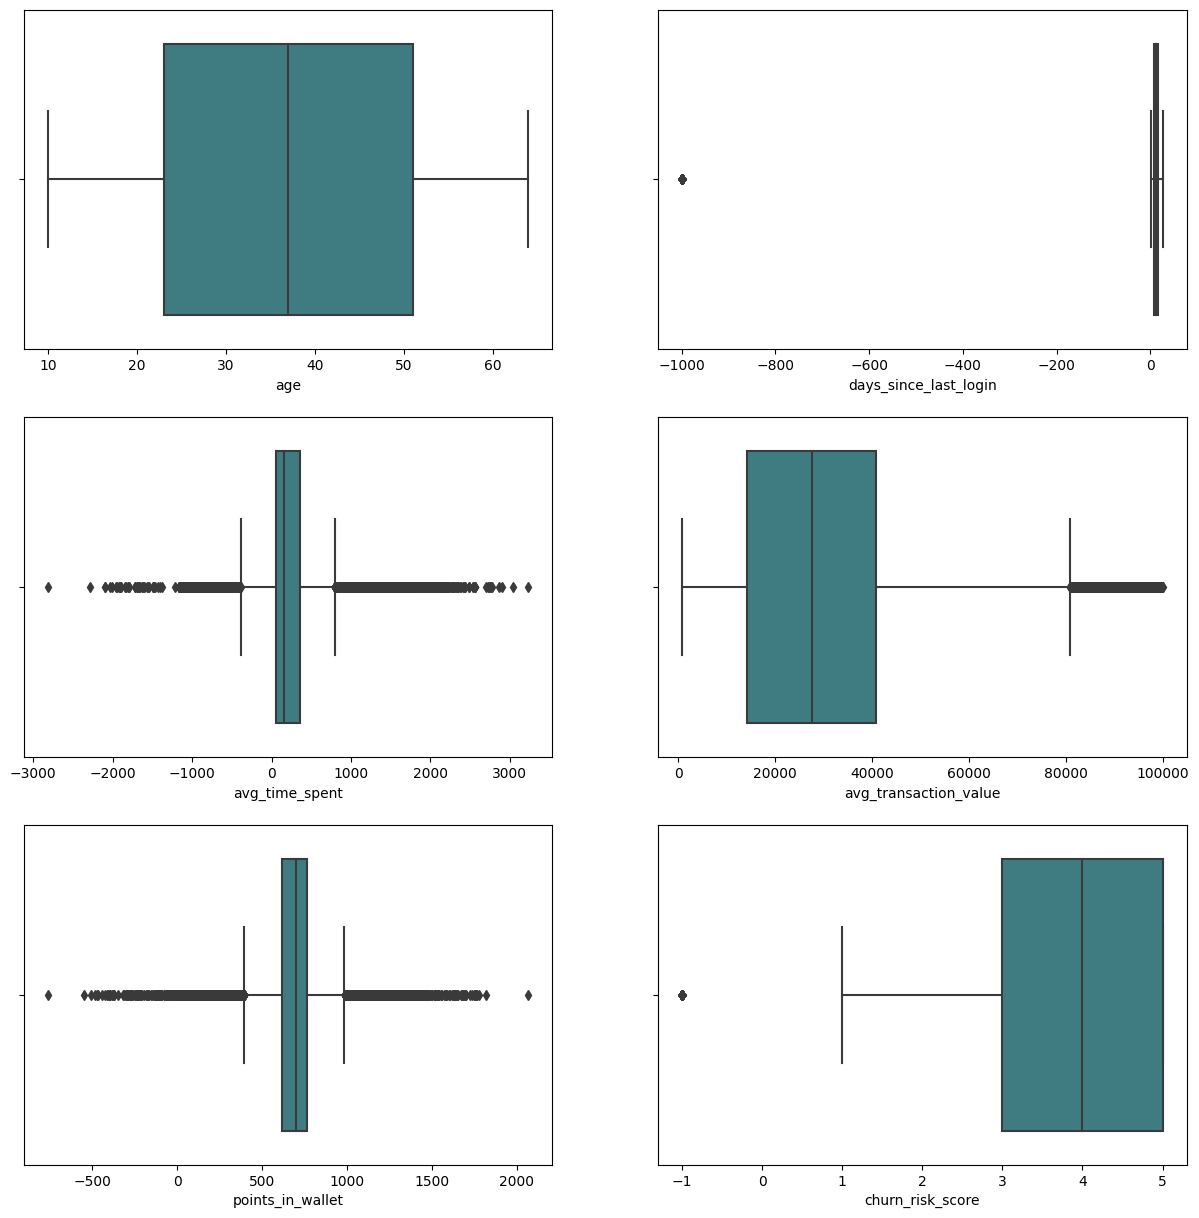

In [ ]:
import math
def draw_boxplot(df, cols, n_rows):
  n_cols = math.ceil(len(cols)/n_rows)
  fig, axes = plt.subplots(n_rows, n_cols, figsize=(15,15), sharex=False, sharey=False)
  for i, col in enumerate(cols):
    sns.boxplot(data=df, x=col, palette='crest', ax=axes[i//(math.ceil(len(cols)/n_rows)), i%n_cols])
draw_boxplot(df, continuous_columns,3)

<Axes: xlabel='churn_risk_score', ylabel='count'>

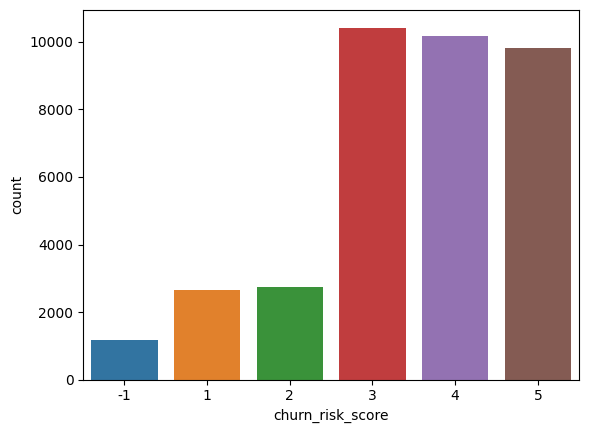

In [ ]:
sns.countplot(x='churn_risk_score', data=df)

<Axes: xlabel='points_in_wallet', ylabel='Count'>

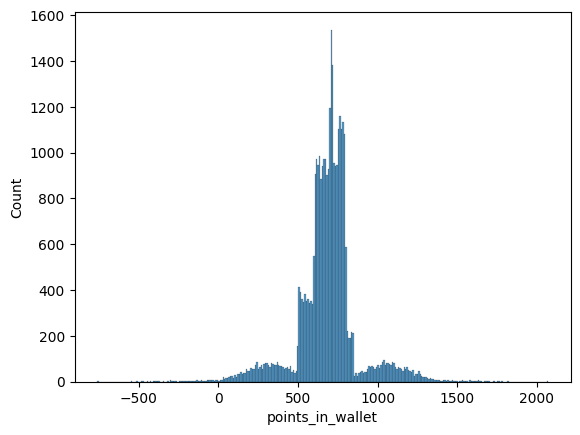

In [ ]:
sns.histplot(data=df, x='points_in_wallet')

In [ ]:
import math
def draw_countplot(df, cols, n_rows, figsize):
  n_cols = math.ceil(len(cols)/n_rows)
  fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize, sharex=False, sharey=False)
  for i, col in enumerate(cols):
    sns.countplot(data=df, y=col, ax=axes[i//(math.ceil(len(cols)/n_rows)), i%n_cols])

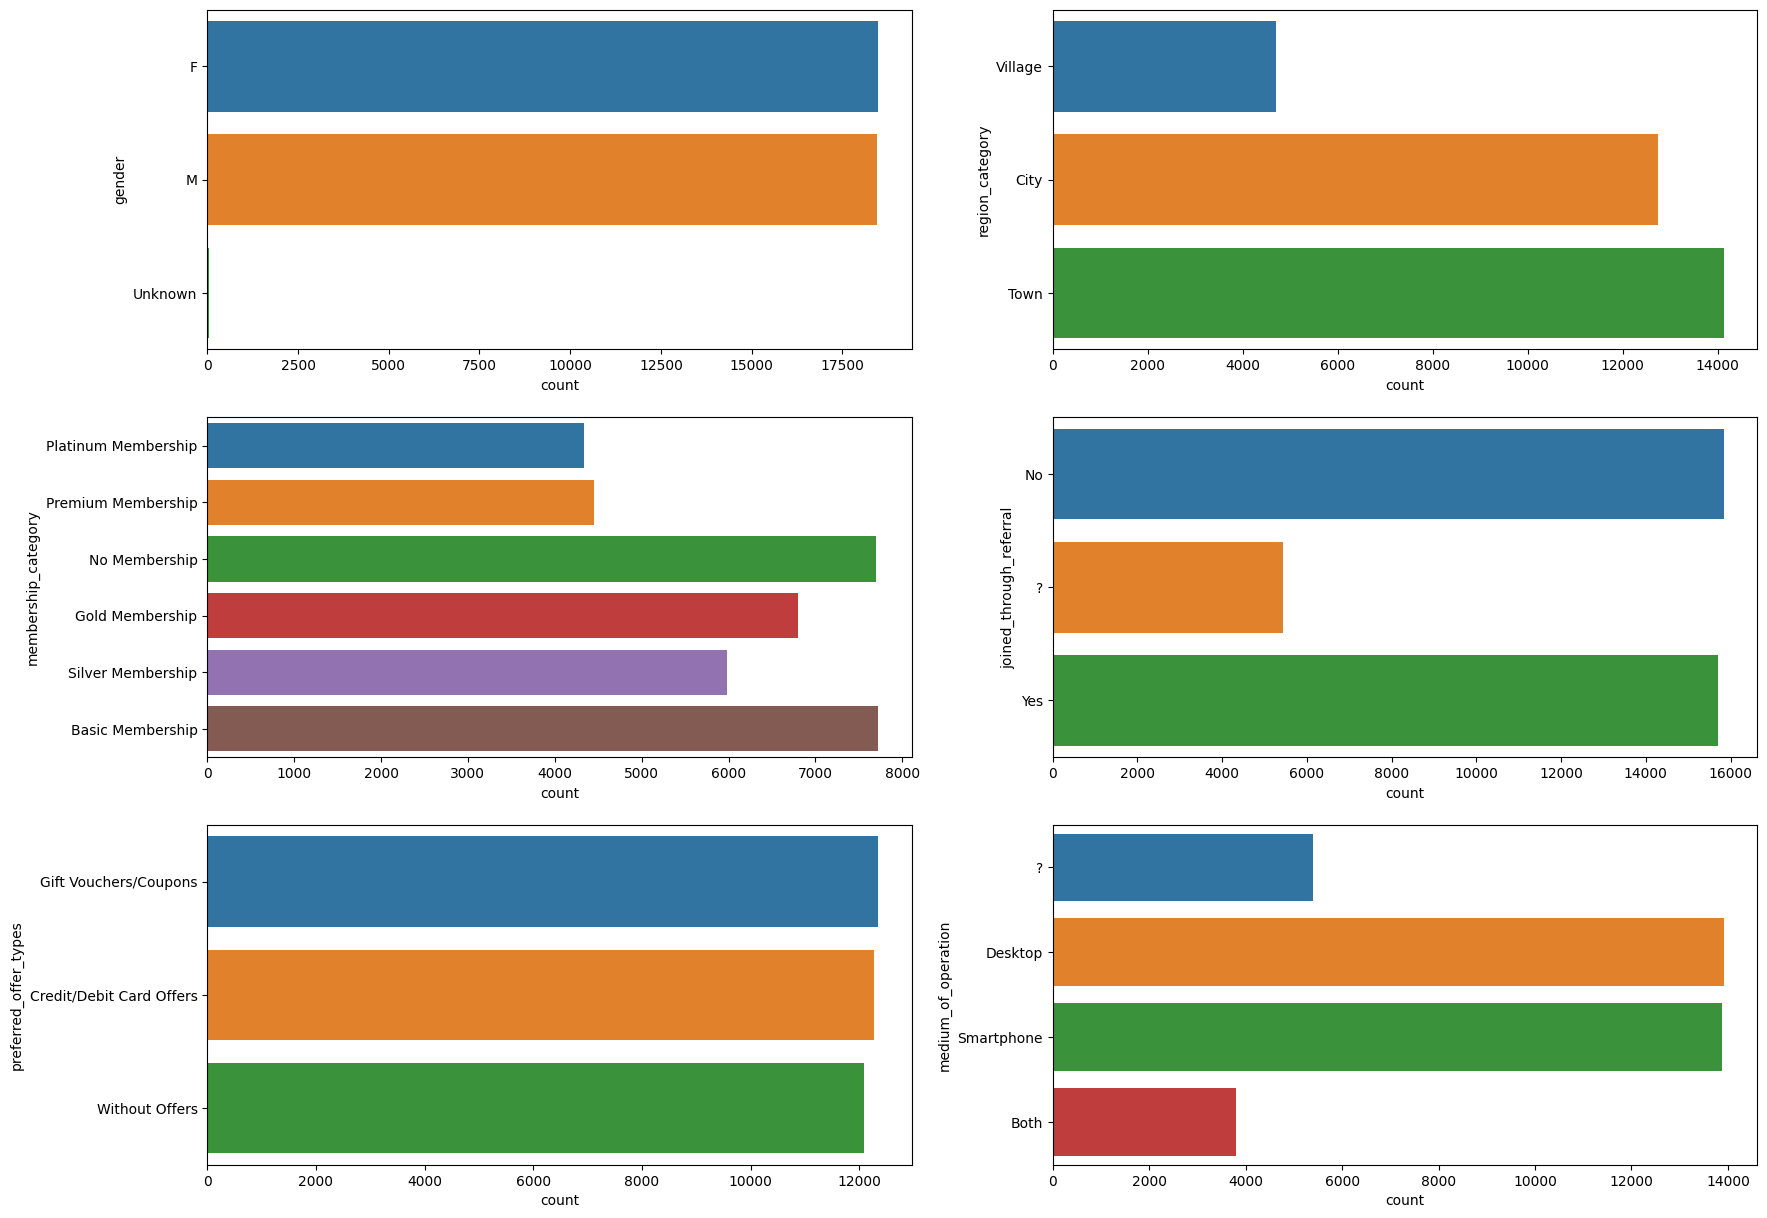

In [ ]:
draw_countplot(df, categorical_features[:6], 3, (20,15))
#gender, joined_through_referral, medium_of_operation cần được xử lý

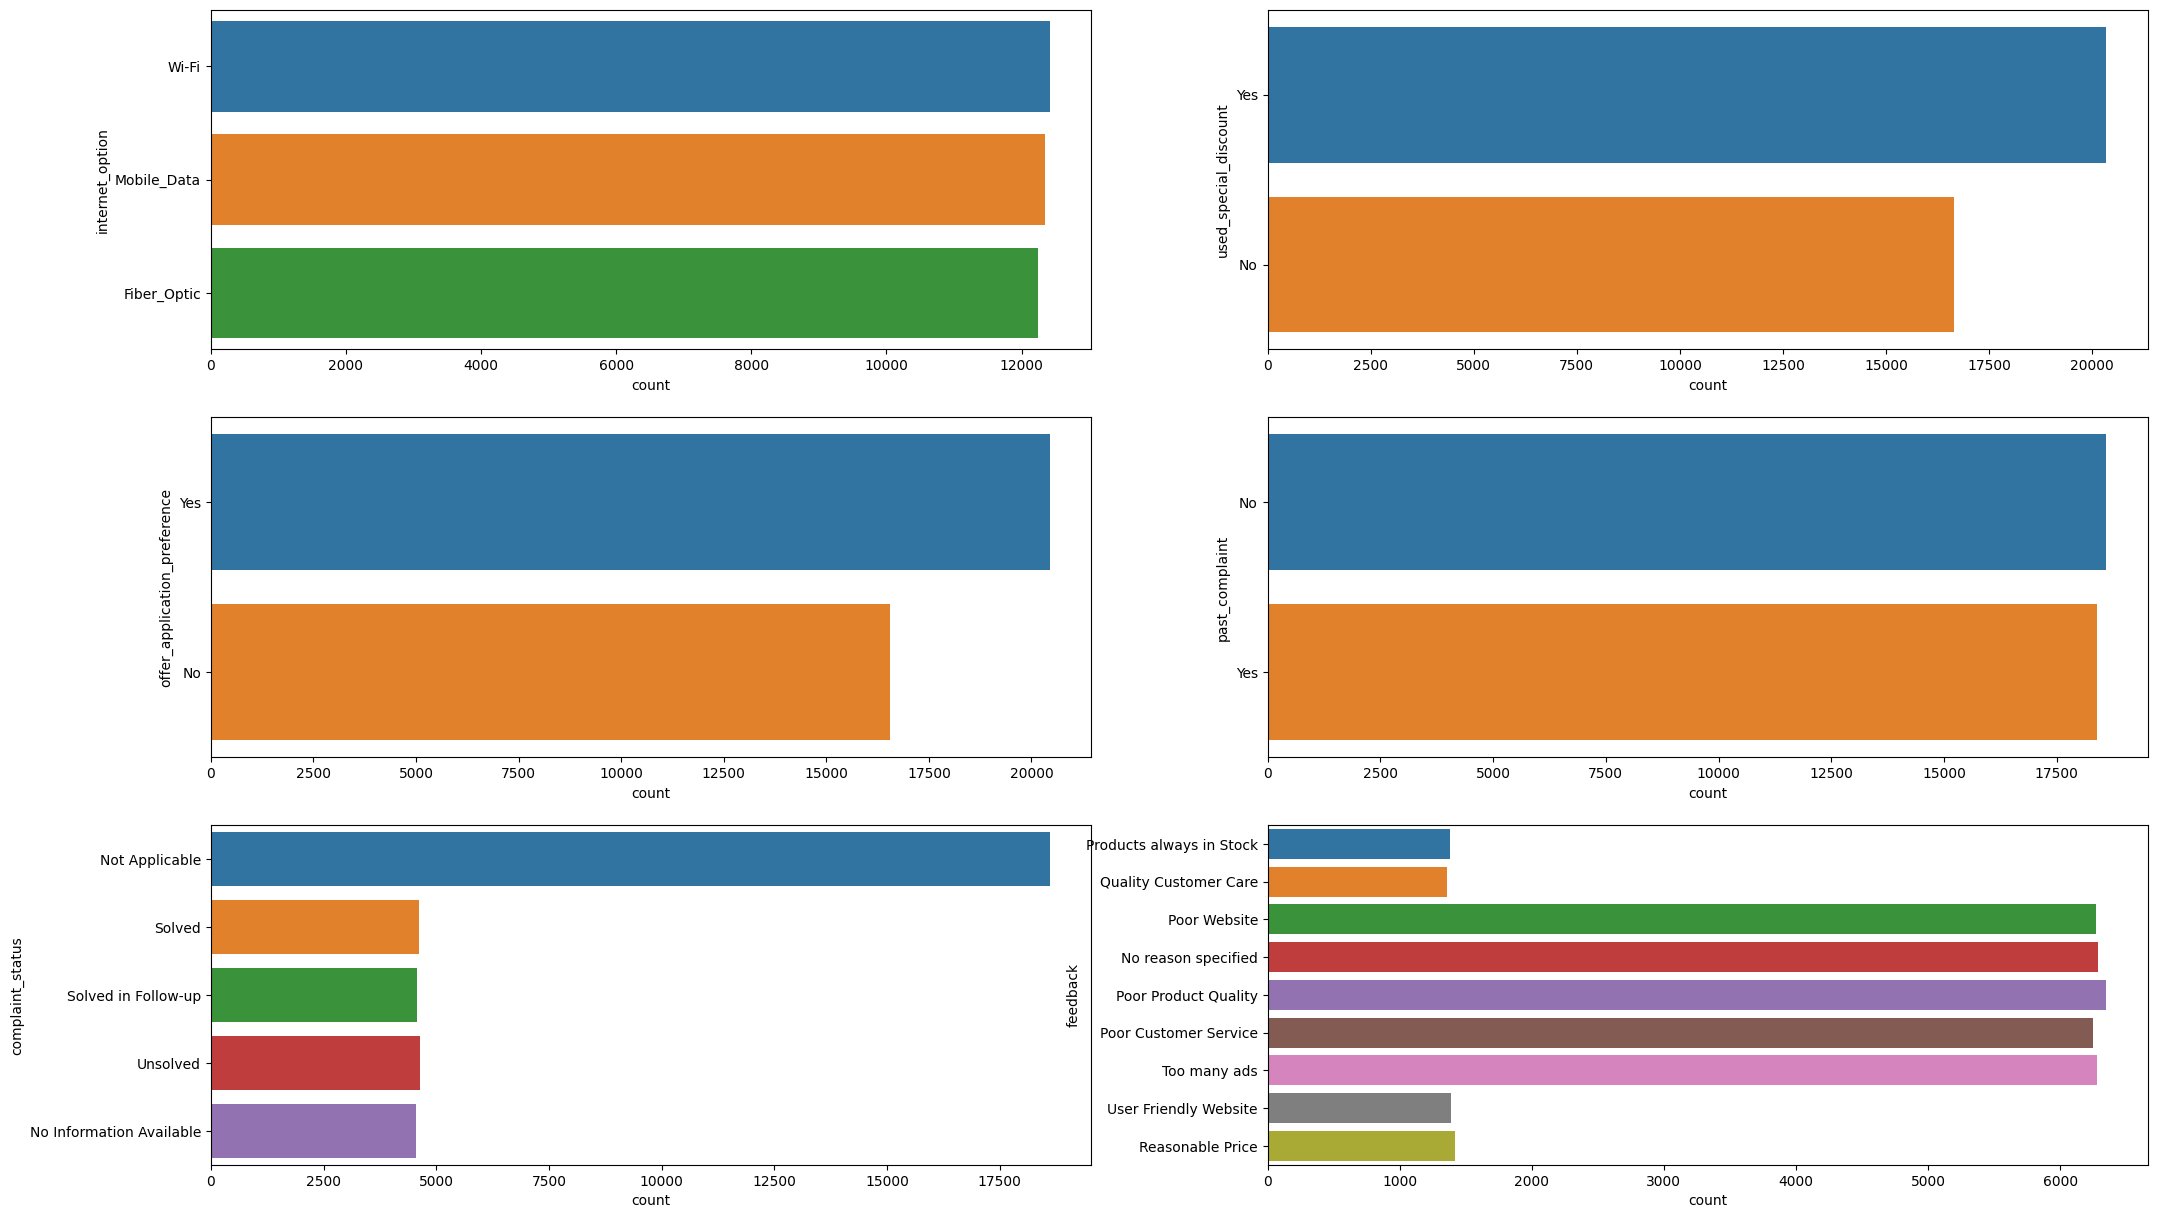

In [ ]:
draw_countplot(df, categorical_features[6:], 3, (25,15))

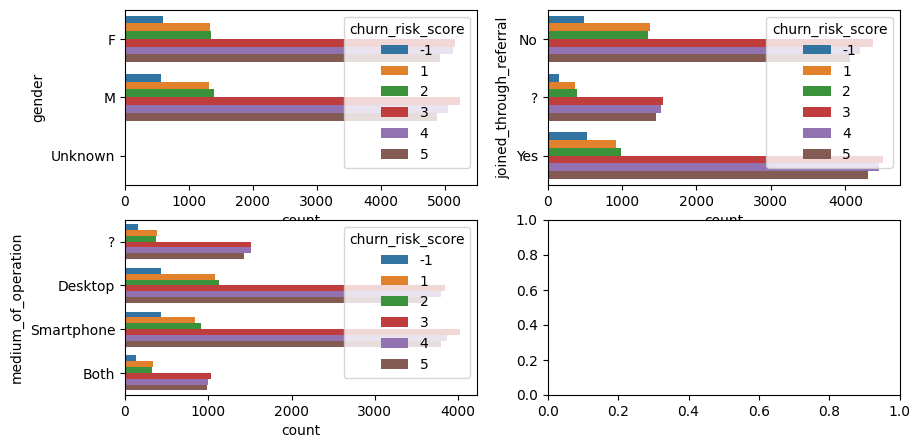

In [ ]:
problem_cols = ['gender', 'joined_through_referral', 'medium_of_operation']
def draw_countplot(df, cols, n_rows, figsize):
  n_cols = math.ceil(len(cols)/n_rows)
  fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize, sharex=False, sharey=False)
  for i, col in enumerate(cols):
    sns.countplot(data=df, y=col,hue='churn_risk_score', ax=axes[i//(math.ceil(len(cols)/n_rows)), i%n_cols])
draw_countplot(df, problem_cols, 2, (10, 5))

#Data Preprocessing

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
PATH = "/content/HomeWork-churn_rate_prediction.csv"
df = pd.read_csv(PATH)

In [ ]:
def data_preprocessing(df):
  #Replace invalid data by NaN
  df.replace('Error', np.NaN, inplace = True)
  df.replace('?', np.NaN, inplace = True)
  df.replace('Unknown', np.NaN, inplace = True)

  #Convert avg_frequency_login_days feature type to float
  df['avg_frequency_login_days'] =  df['avg_frequency_login_days'].astype('float')

  #drop meaningless features
  drop_features = [col for col in df.columns if df[col].dtype=='O' and df[col].nunique() > 9]
  df.drop(drop_features, axis = 1, inplace = True)

  #Drop data with wrong label
  df.drop(df[df['churn_risk_score']==-1].index, axis=0, inplace=True)

  missing_columns = ['gender', 'region_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 'avg_frequency_login_days', 'points_in_wallet']
  negative_columns = ['days_since_last_login', 'avg_time_spent', 'avg_frequency_login_days', 'points_in_wallet']

  missing_categorical_columns = ['gender', 'region_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation']

  imputer = SimpleImputer(strategy='most_frequent')
  for col in missing_categorical_columns:
    df[col] = imputer.fit_transform(df[col].values.reshape(-1,1))

  imputer = SimpleImputer(strategy='median')
  df['avg_frequency_login_days'] = imputer.fit_transform(df['avg_frequency_login_days'].values.reshape(-1,1))
  df['points_in_wallet'] = imputer.fit_transform(df['points_in_wallet'].values.reshape(-1,1))


  #df.loc[df['days_since_last_login']<0, 'days_since_last_login'] = 0
  df['days_since_last_login'] = df['days_since_last_login'].abs()
  df['points_in_wallet'] = df['points_in_wallet'].abs()
  df['avg_time_spent'] = df['avg_time_spent'].abs()
  df['avg_frequency_login_days'] = df['avg_frequency_login_days'].abs()

  return df

df = data_preprocessing(df)

In [ ]:
object_cols = [col for col in categorical_features if df[col].dtype=='O']
for col in object_cols:
  print(col, '\t', df[col].unique())

gender 	 ['F' 'M']
region_category 	 ['Village' 'City' 'Town']
membership_category 	 ['Platinum Membership' 'Premium Membership' 'No Membership'
 'Gold Membership' 'Silver Membership' 'Basic Membership']
joined_through_referral 	 ['No' 'Yes']
preferred_offer_types 	 ['Gift Vouchers/Coupons' 'Credit/Debit Card Offers' 'Without Offers']
medium_of_operation 	 ['Desktop' 'Smartphone' 'Both']
internet_option 	 ['Wi-Fi' 'Mobile_Data' 'Fiber_Optic']
used_special_discount 	 ['Yes' 'No']
offer_application_preference 	 ['Yes' 'No']
past_complaint 	 ['No' 'Yes']
complaint_status 	 ['Not Applicable' 'Solved' 'Solved in Follow-up' 'Unsolved'
 'No Information Available']
feedback 	 ['Products always in Stock' 'Quality Customer Care' 'Poor Website'
 'No reason specified' 'Poor Product Quality' 'Poor Customer Service'
 'Too many ads' 'User Friendly Website' 'Reasonable Price']


# Feature Engineering

In [ ]:
#capping outliers
def iqr_capping(df, cols):
  for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    upper_whisker = q3 + 1.5*iqr
    lower_whisker = q1 - 1.5*iqr
    df[col] =np.where(df[col]>upper_whisker, upper_whisker, np.where(df[col]<lower_whisker, lower_whisker, df[col]))
  return df

In [ ]:
def apply_feature_engineering(df):
    """
    Apply all feature engineering to transform your data into number
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: Normalize your data
    df = iqr_capping(df, continuous_columns)
    object_cols = [col for col in df.columns if df[col].dtype=='O']
    df[object_cols] = df[object_cols].astype("category")
    temp =  pd.get_dummies(df[object_cols])
    df.drop(object_cols, axis=1, inplace=True)
    df = pd.concat([temp, df], axis=1)
    return df

df = apply_feature_engineering(df)

In [ ]:
print(continuous_columns)

['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'points_in_wallet', 'churn_risk_score']


In [ ]:
df.head()

,gender_F,gender_M,region_category_City,region_category_Town,region_category_Village,membership_category_Basic Membership,membership_category_Gold Membership,membership_category_No Membership,membership_category_Platinum Membership,membership_category_Premium Membership,...,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
0,1,0,0,0,1,0,0,0,1,0,...,0,0,0,18.0,17.0,300.63,53005.25,17.0,781.75,2.0
1,1,0,1,0,0,0,0,0,0,1,...,0,0,0,32.0,16.0,306.34,12838.38,10.0,697.82,1.0
2,1,0,0,1,0,0,0,1,0,0,...,0,0,0,44.0,14.0,516.16,21027.00,22.0,500.69,5.0
3,0,1,1,0,0,0,0,1,0,0,...,0,0,0,37.0,11.0,53.27,25239.56,6.0,567.66,5.0
4,1,0,1,0,0,0,0,1,0,0,...,0,0,0,31.0,20.0,113.13,24483.66,16.0,663.06,5.0


In [ ]:
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    # Todo: Split data into X and y (using sklearn train_test_split). Return two dataframes
    X = df.drop('churn_risk_score', axis=1)# Todo: Select features
    y = df['churn_risk_score']# Todo: Select label
    return X, y

X, y = prepare_X_y(df)

In [ ]:
print(X.info())
print(y)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35829 entries, 0 to 36991
Data columns (total 48 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   gender_F                                        35829 non-null  uint8  
 1   gender_M                                        35829 non-null  uint8  
 2   region_category_City                            35829 non-null  uint8  
 3   region_category_Town                            35829 non-null  uint8  
 4   region_category_Village                         35829 non-null  uint8  
 5   membership_category_Basic Membership            35829 non-null  uint8  
 6   membership_category_Gold Membership             35829 non-null  uint8  
 7   membership_category_No Membership               35829 non-null  uint8  
 8   membership_category_Platinum Membership         35829 non-null  uint8  
 9   membership_category_Premium Membership 

#Apply Machine Learning Model

##Train test split

In [ ]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 1
TRAIN_SIZE = 0.7

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

##Build SK-learn Model

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler

When kernel is set to ‘rbf’, it means that the model will use radial basis funcitons for classification or regression. RBF kernels are capable of dealing with complex multi-class datasets and have good generalization performance with noisy data points.

In [ ]:
def build_SVC_model(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """
    svc = SVC()
    scaler = StandardScaler()
    # Todo: Input your scaler and logistic model into pipeline
    model = Pipeline(steps=[
        ('scaler', scaler),
        ('svc', svc)
    ])
    # Todo: fit your model with X, y

    param_grids = {
        'svc__C': [0.1, 1, 5, 10],
        'svc__gamma': ['scale',0.001, 0.01, 1],
        'svc__kernel': ['rbf']
    }
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state = RANDOM_STATE)
    grid = GridSearchCV(model, param_grids, n_jobs=-1, cv=cv)
    grid.fit(X,y)
    return grid


In [ ]:
model = build_SVC_model(trainX, trainY)

In [ ]:
print('model best params:', model.best_params_)

model best params: {'svc__C': 10, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


In [ ]:
pred = model.predict(trainX)
print(pred)
print(classification_report(trainY, pred))

[4. 5. 4. ... 5. 3. 5.]
              precision    recall  f1-score   support

         1.0       0.58      0.90      0.71      1862
         2.0       0.80      0.38      0.51      1950
         3.0       0.90      0.92      0.91      7250
         4.0       0.83      0.39      0.53      7131
         5.0       0.66      1.00      0.79      6887

    accuracy                           0.75     25080
   macro avg       0.75      0.72      0.69     25080
weighted avg       0.78      0.75      0.72     25080



In [ ]:
pred = model.predict(testX)
print(pred)
print(classification_report(testY, pred))

[4. 3. 1. ... 5. 5. 3.]
              precision    recall  f1-score   support

         1.0       0.59      0.90      0.71       790
         2.0       0.79      0.38      0.52       791
         3.0       0.89      0.91      0.90      3174
         4.0       0.80      0.39      0.52      3054
         5.0       0.66      1.00      0.79      2940

    accuracy                           0.75     10749
   macro avg       0.75      0.72      0.69     10749
weighted avg       0.77      0.75      0.72     10749



In [ ]:
pred = model.predict(trainX)
print(pred)
print(classification_report(trainY, pred))

[4. 4. 3. ... 2. 3. 3.]
              precision    recall  f1-score   support

         1.0       0.74      0.92      0.82      1872
         2.0       0.89      0.69      0.78      1903
         3.0       0.91      0.92      0.91      7336
         4.0       0.83      0.41      0.55      7088
         5.0       0.66      1.00      0.80      6881

    accuracy                           0.78     25080
   macro avg       0.81      0.79      0.77     25080
weighted avg       0.81      0.78      0.76     25080



In [ ]:
pred = model.predict(testX)
print(pred)
print(classification_report(testY, pred))

[1. 3. 1. ... 3. 4. 5.]
              precision    recall  f1-score   support

         1.0       0.60      0.78      0.68       780
         2.0       0.71      0.52      0.60       838
         3.0       0.86      0.87      0.86      3088
         4.0       0.73      0.34      0.47      3097
         5.0       0.65      1.00      0.79      2946

    accuracy                           0.72     10749
   macro avg       0.71      0.70      0.68     10749
weighted avg       0.73      0.72      0.69     10749

